![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [2]:
def retangulo(f,a,b,n=100):
    xs, h = np.linspace(a, b, num=n, endpoint=False, retstep = True)
    return np.sum(f(xs))*h

def midpoint(f,a,b,n=100):
    l, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    if n == 1:
        h = abs(b-a)
    mids = l + h/2
    return np.sum(f(mids)*h)
def simpson(f,a,b,n=100):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    if n == 1:
        h = abs(b-a)
    mids = l + h/2
    return (4*np.sum(f(mids)) + 2*np.sum(f(l)) + (f(b)-f(a))) * h/6
methods = [retangulo, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

In [3]:
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [4]:
def f(x):
    return np.abs(x)

## Questão 1: Dê uma primitiva de $f$.

In [5]:
def F(x):
    return ((x**2)*np.sign(x))/2

In [6]:
assert np.abs(df(F,1) - 1) < 1e-12

In [7]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [25]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil

In [26]:
df(F,0)

3.814697265625e-06

## Questão 2: Convergência das integrais

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$?

1. Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos
    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda
2. Depois, dê a ordem do método do retângulo

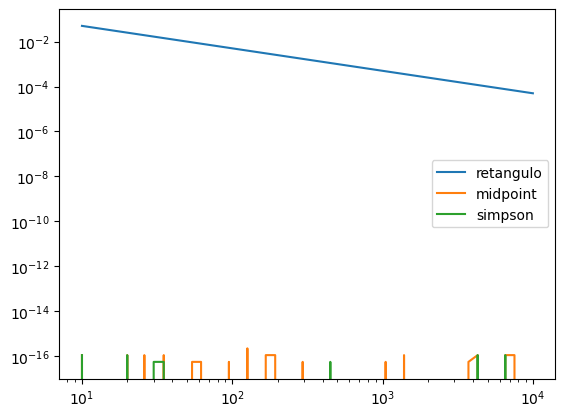

In [27]:
ans = F(1) - F(0)
ns = np.logspace(1,4,dtype=int)
for m in methods:
    valores = np.array([m(f,0,1,n) for n in ns])
    plt.loglog(ns,abs(ans-valores),label=m.__name__)
plt.legend()
plt.show()

In [13]:
decay_speed = 1
# de 0 até 10 o erro vai de 0,5 té 0,1
# de 10 até 100 o erro vai de 0,05 até 0,01
#de 100 até 1000 o erro vai de 0,005 até 0,001

In [14]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = retangulo(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = retangulo(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

Explique porque o teste está dando a ordem de convergência (Bônus)

YOUR ANSWER HERE

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

Bom, eles foram precisos na maior parte do intevalo. Os erros com o metodo do ponto medio acontece com mais frequencia, e os erros do metodo de Simpson acontecem quase sempre no mesmo intervalo que no do ponto medio. 

## Questão 3: Mudando o intervalo de integração

Agora, faça o gráfico do erro para o intervalo $[-1,2]$.

In [15]:
def graph_err(f,a,b,ans):
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        valores = np.array([m(f,a,b,n) for n in ns])
        plt.loglog(ns,abs(valores-ans),label=m.__name__)
    plt.legend()

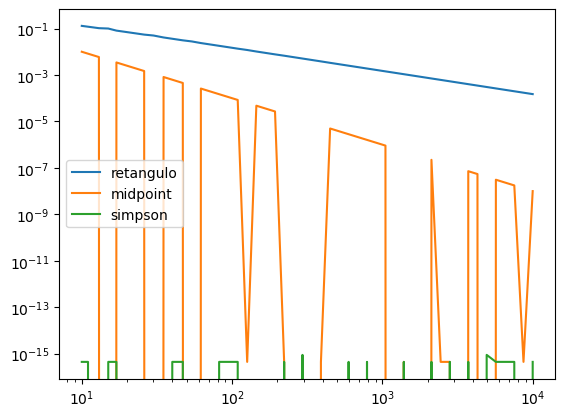

In [16]:
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
plt.show()

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

Em determinados momentos as funções mid point e simpson possuem Erro 0. Na função simpson esse intervalo é maior e o erro dela é de uma escala muito menor ao Erro das outras, mesmo que nem sempre a função seja precisa, o erro é tão pequeno comparado aos outros que ainda é a melhor a se usar.

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

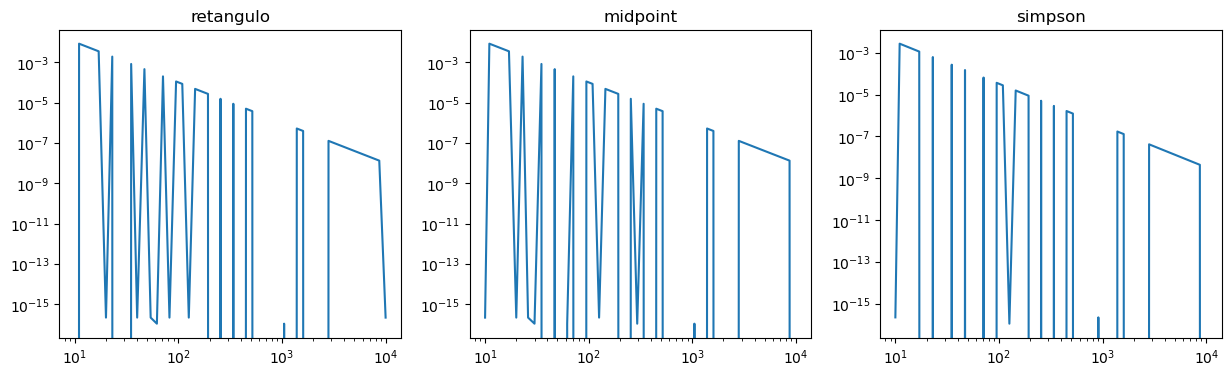

In [17]:
ans = F(1) - F(-1)
ns = np.logspace(1,4,dtype=int)
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for m,ax in zip(methods,axs):
    valores = np.array([m(f,-1,1,n) for n in ns])
    ax.loglog(ns,abs(valores-ans))
    ax.set_title(m.__name__)
plt.show()

O que aconteceu agora?
Porquê?

A taxa de convergencia dos erros decrescente de forma linear, com o coeficiente angular igual para os 3,e os momentos em que metodo do retangulo teve o erro igual a 0 foi parecido com os do midpoint. O metodo de Simpson ainda é a melhor aproximação por embora tenha a taxa de convergencia igual, ele zera o erro em maiores intervalos que os outros metodos

## Questão 4: Intervalos "aleatórios"!

Como sugerido abaixo:
- Estude em três intervalos aleatórios;
- Para cada um deles, dê a evolução dos erros dos métodos conforme $n$ aumenta.

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

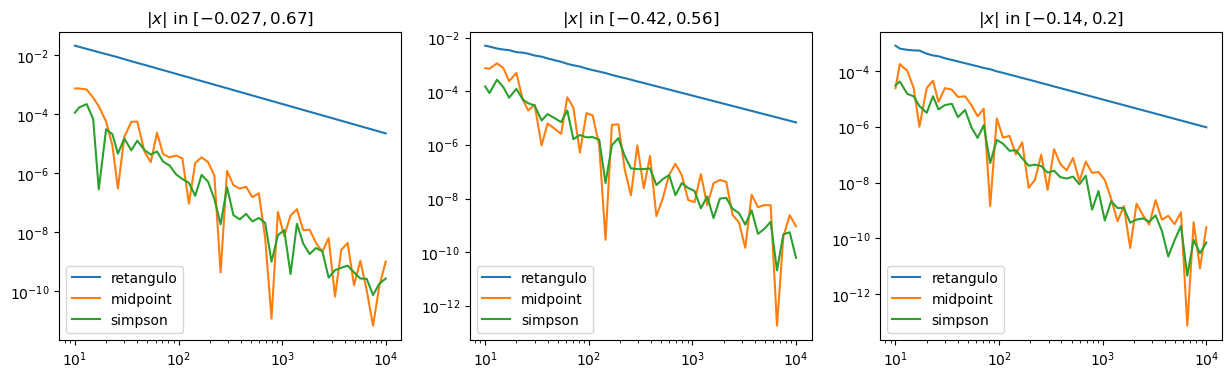

In [28]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    a,b = -np.random.rand(), np.random.rand()
    plt.sca(ax)
    ans=F(b)-F(a)
    graph_err(f,a,b,ans)
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
plt.show()

Como você interpreta o que aconteceu?

Como não é um intervalo inteiro, as aproximação do computador não chega a zerar o erro, porem a taxa de convergencia continua igual. o metodo do rentangulo sendo o pior e o metodo de simpson sendo o que mais se aproxima do valor certo

# Parte 2: Uma função descontínua

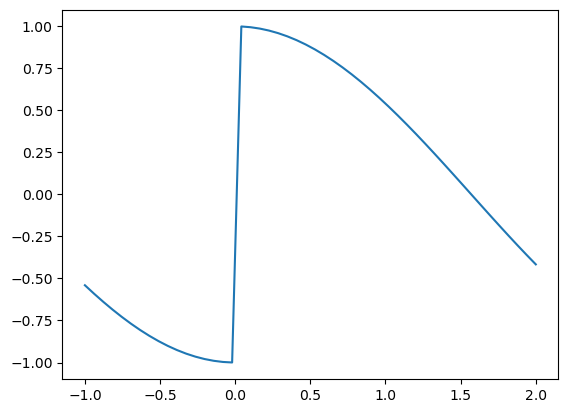

In [29]:
def g(x):
    return np.cos(x)*np.sign(x)

ts = np.linspace(-1,2)
plt.plot(ts, g(ts))
plt.show()

## Questão 5: Dê uma primitiva de $g$

In [20]:
def G(x):
    return np.sin(x)*np.sign(x)

In [21]:
assert np.abs(df(G,1) - g(1)) < 1e-12

In [22]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(G,xs) - g(xs))/g(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 6: Gráficos de erro!

- Para os intervalos [-1,1] e [-1,2]

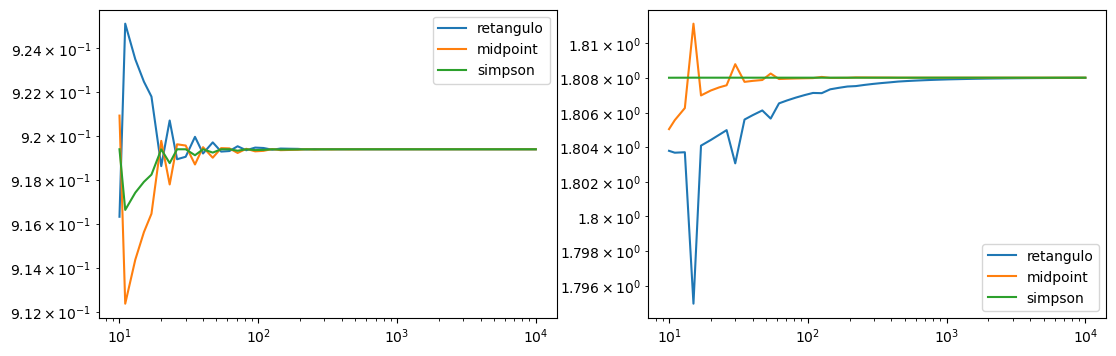

In [23]:
_,axs = plt.subplots(ncols=2, figsize=(13,4))
a,b = -1,1
for ax in axs:
    plt.sca(ax)
    ans=G(b)-G(a)
    graph_err(G,a,b,ans)
    a,b=-1,2

E agora para três intervalos aleatórios

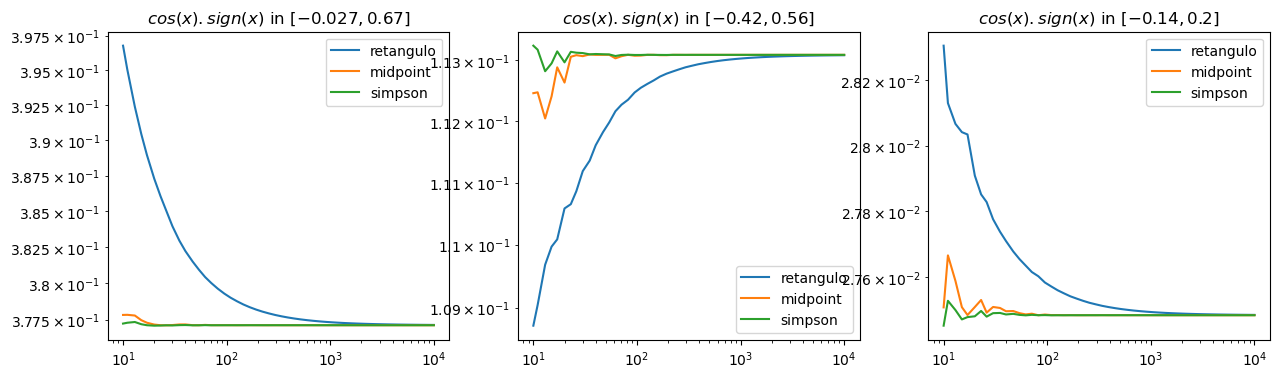

In [24]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    a,b = -np.random.rand(), np.random.rand()
    plt.sca(ax)
    ans=G(b)-G(a)
    graph_err(G,a,b,ans)
    ax.set_title('$cos(x).sign(x)$ in $[{:.2},{:.2}]$'.format(a,b))
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?